In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
%matplotlib inline

## Create Data 

In [108]:
X = []
Y_totalcases = []
Days = []
for i in range(0, 9):
    X.append(i)

start_data = "Data/Covid-07-04.csv"
tempt = "07"
date = "07/04/2022"
for i in range(7, 16):
    s = str(i)
    if (len(s) == 1):
        s = "0" + s
    start_data = start_data.replace(tempt, s)
    date = date.replace(tempt, s)
    Days.append(date)
    tempt = s
    data = pd.read_csv(start_data)
    Y_totalcases.append(int(data["TotalCases"].sum()))
    Y_totaldeaths.append(int(data["TotalDeaths"].sum()))

In [68]:
Y_totalcases

[496234246,
 497321931,
 498146058,
 498787293,
 499527760,
 500648873,
 500663565,
 502731235,
 503432893]

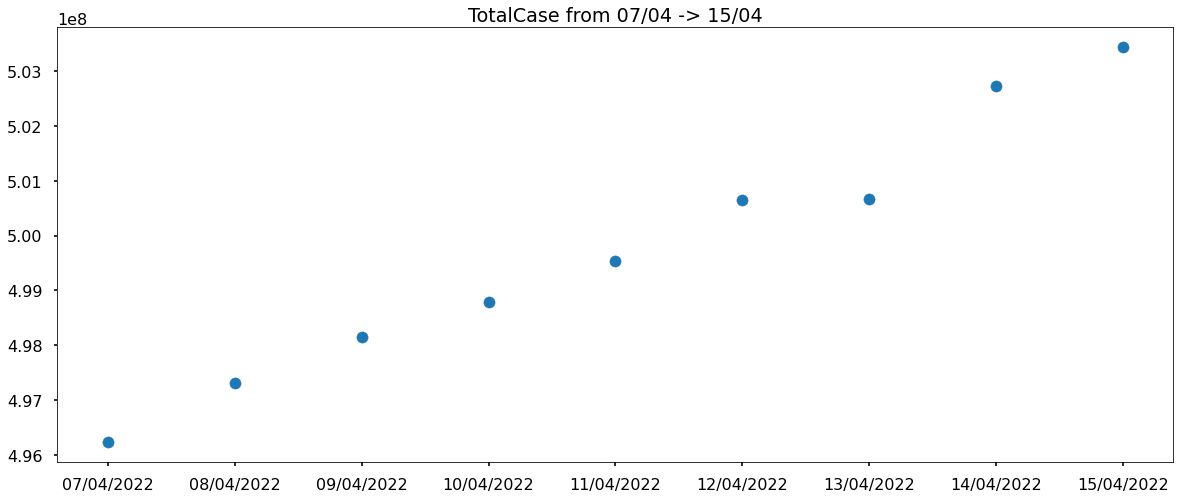

In [76]:
plt.figure(figsize = (20, 8))
plt.title("TotalCase from 07/04 -> 15/04")
plt.scatter(Days,Y_totalcases)
plt.show()

In [99]:
kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
svm_search.fit(np.array(X).reshape(-1, 1), Y_totalcases)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [101]:
svm_confirmed = svm_search.best_estimator_

In [102]:
svm_confirmed

SVR(C=10, epsilon=1, gamma=1, kernel='poly', shrinking=False)

MAE: 713394.3843843937
MSE: 1051518786133.8698


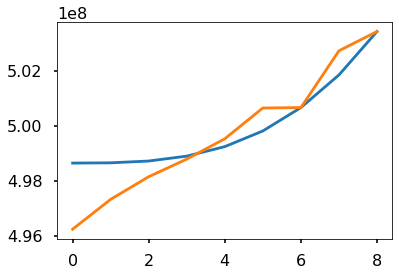

In [106]:
# check against training data
svm_test_pred = svm_confirmed.predict(np.array(X).reshape(-1, 1))
plt.plot(svm_test_pred)
plt.plot(Y_totalcases)
print('MAE:', mean_absolute_error(svm_test_pred, Y_totalcases))
print('MSE:',mean_squared_error(svm_test_pred, Y_totalcases))

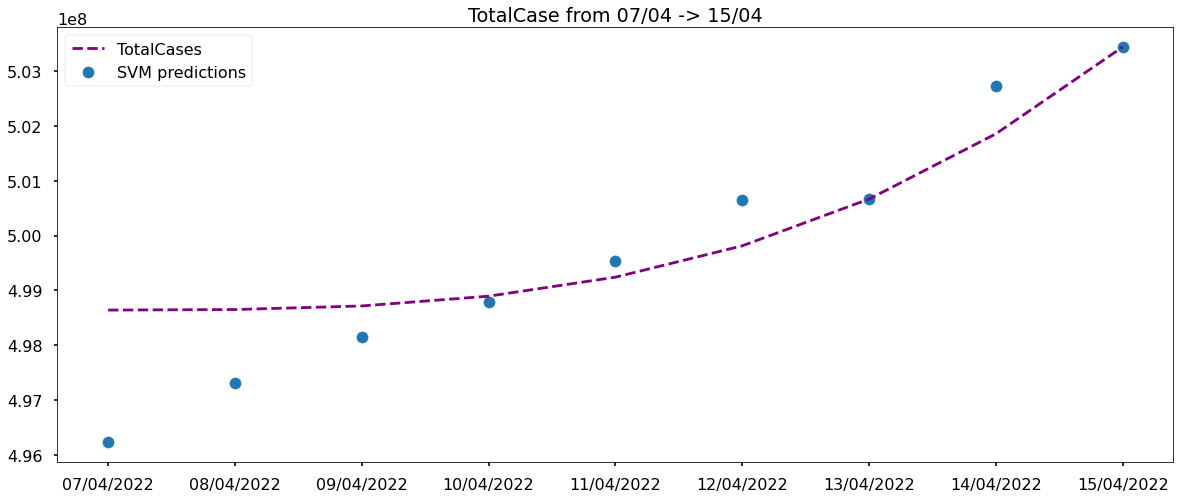

In [107]:
plt.figure(figsize = (20, 8))
plt.title("TotalCase from 07/04 -> 15/04")
plt.scatter(Days,Y_totalcases)
plt.plot(Days, svm_test_pred, linestyle='dashed', color='purple')
plt.legend(['TotalCases', 'SVM predictions'])
plt.show()